# Interactive Stock Analysis
The goal of this project is to provide code that will fetch data from finance site and, with the use of python code, parse through the data and re-format in a way that is easier to understand.

Importing Python packages

In [23]:
#Import pandas for functions and datareading
#Import MatplotLib for plotting
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

Function to provide financial data when called

In [24]:
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns = df.columns
    output = df.stack(level=-1)
    return output
# Set 'Name' as the index of the dataframe

Calling function

In [25]:
data_pack = readmydata(tickers=['AAPL', 'CVX'], start_date='2022-03-01', end_date='2022-06-05')
data_pack.head()

Attributes           Adj Close       Close        High         Low  \
Date       Symbols                                                   
2022-03-01 AAPL     162.960571  163.199997  166.600006  161.970001   
           CVX      148.498352  149.720001  149.960007  144.699997   
2022-03-02 AAPL     166.315643  166.559998  167.360001  162.949997   
           CVX      152.882294  154.139999  155.750000  150.050003   
2022-03-03 AAPL     165.986115  166.229996  168.910004  165.550003   

Attributes                Open      Volume  
Date       Symbols                          
2022-03-01 AAPL     164.699997  83474400.0  
           CVX      145.009995  31159900.0  
2022-03-02 AAPL     164.389999  79724800.0  
           CVX      150.199997  31329500.0  
2022-03-03 AAPL     168.470001  76678400.0

In [29]:
close = data_pack["Close"]
close.head()

Date        Symbols
2022-03-01  AAPL       163.199997
            CVX        149.720001
2022-03-02  AAPL       166.559998
            CVX        154.139999
2022-03-03  AAPL       166.229996
Name: Close, dtype: float64

Function takes as input dataframe and picks columns

In [35]:
def pickmydata(data_pack, attributes):
    data_pack
    #Object series indexed by date
    tickers = close.loc[:, 'AAPL']
    
    #20-day moving average
    short_rolling_tickers = tickers.rolling(window=20).mean()
    
    #Plot
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(tickers.index, tickers, label=tickers)
    ax.plot(short_rolling_tickers.index, short_rolling_tickers, label='20 days rolling')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted ' + attributes + ' Price ($)')
    ax.legend()
    return data_pack.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
count,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02
mean,162.273791,162.909851,165.069329,160.403433,162.625522,5.591195e+07
std,9.425336,9.535717,9.287522,9.797343,9.583816,4.473858e+07
min,137.350006,137.350006,140.699997,132.610001,137.389999,6.970200e+06
25%,157.043636,157.530003,160.235001,155.177494,158.264996,1.044165e+07
50%,163.331337,164.474998,166.540001,162.614998,164.345001,6.247740e+07
75%,168.996994,170.049995,172.005001,166.505001,168.902504,9.133580e+07
max,178.697449,178.960007,180.960007,176.699997,179.960007,1.826020e+08


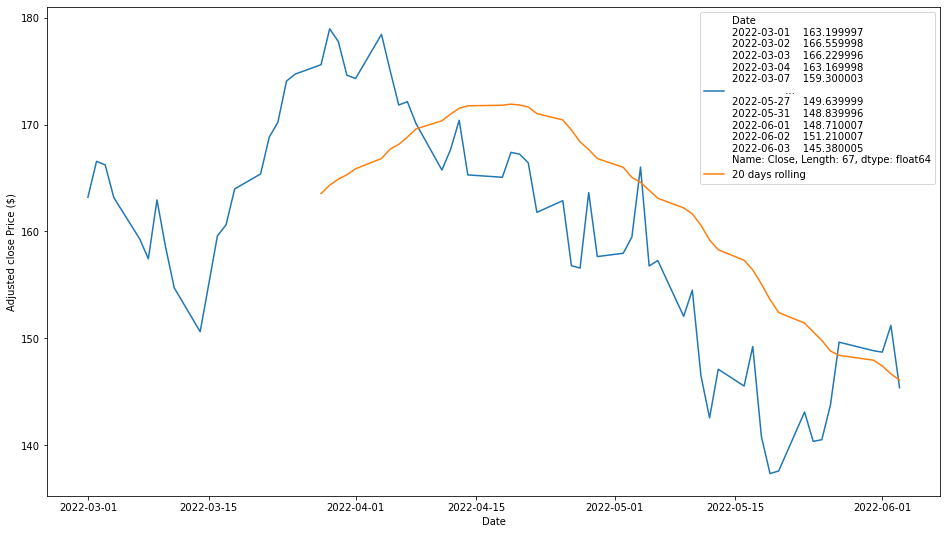

In [36]:
pickmydata(data_pack, "close")